# Title

## Zain Fox-Latif | 21018444

Introduction...

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [37]:
def force(r1,r2,m1,m2):
    """Function purpose
    
    Inputs...
    dick
    Returns...
    cum
    """
    # Find r_12 and its magnitude|
    r_12 = r2 - r1
    f_on_m1 = (G * m1 * m2)/(np.sqrt(r_12[0]**2 + r_12[1]**2))**3 * r_12
    return f_on_m1

## Simple tests: Euler

Write something about the Euler method and what you are testing with it

In [104]:
# Set up parameters
Ndim = 2     #2D problem for now
Nsteps = 10000
dt = 0.001
G = 1        # Appropriate units
m1 = 0.0001  # Small
m2 = 1.0     # Large
r1 = np.zeros((Nsteps, Ndim))
r2 = np.zeros((Nsteps, Ndim))
v1 = np.zeros((Nsteps, Ndim))
v2 = np.zeros((Nsteps, Ndim))
# Set up storage for energies
# Initial conditions
r1[0] = np.array((1.0, 0))
v1[0] = np.array((0, np.sqrt(G*m2) ))

T = np.zeros((Nsteps))
V = np.zeros((Nsteps))

T[0] = 0.5 * m1 * np.sqrt(G*m2)
V[0] = -G * m1 * m2

In [219]:
for i in range(Nsteps-1): # We calculate r, v at i+1
    f1 = force(r1[i], r2[i], m1, m2)
    # v1 at next step = v1 at this step + dt * dv/dt
    v1[i+1] = v1[i] + dt * f1/m1
    # r1 at next step = r1 at this step + dt * dr/dt
    r1[i+1] = r1[i] + dt * v1[i+1]

    # Calculate energies if calculating them during loop
    T[i+1] = 1/2 * m1 * np.linalg.norm(v1[i+1])**2
    V[i+1] = (-G * m1 * m2) / (np.linalg.norm(r2[i+1]-r1[i+1]))

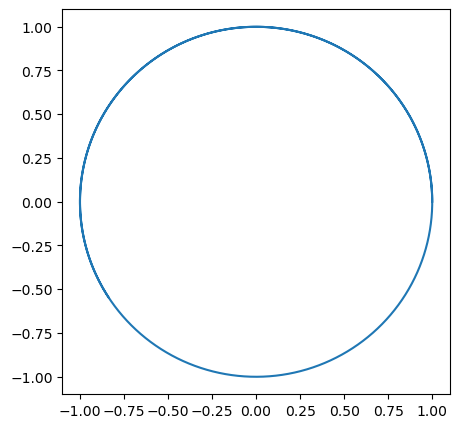

In [220]:
# Plot orbit either x vs y or x and y vs t

fig = plt.figure(figsize=(5,5))

plt.plot(r1[:,0],r1[:,1])

# If using x vs y, make the figure square: create a figure or set scaling
# fig = plt.figure(figsize=(5,5))
# plt.axis('scaled')

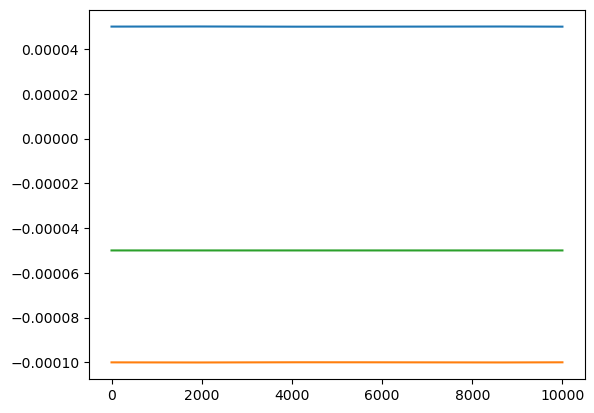

In [231]:
# Plot some kind of energy (calculate if necessary) vs t

plt.plot(T)
plt.plot(V)
plt.plot(V+T)

Describe the form for the angular momentum, and plot it below

Text(0.5, 1.0, 'Angular Momentum as a Function of Time')

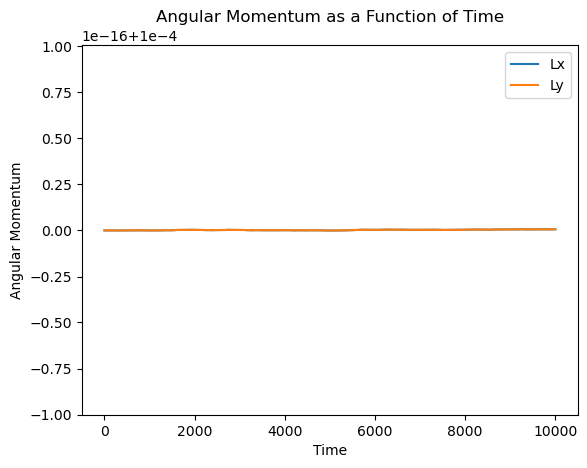

In [251]:
# Plot angular momentum vs t

L = np.zeros((Nsteps, Ndim))
for i in range(Nsteps):
    L[i] = np.cross(r1[i], m1 * v1[i])

fig = plt.figure()
plt.plot(L[:,0], label='Lx')
plt.plot(L[:,1], label='Ly')

plt.legend()
plt.xlabel('Time')
plt.ylabel('Angular Momentum')
plt.title('Angular Momentum as a Function of Time')


Write something about what you have learned, for instance: How reliable is Euler? What is the effect of timestep?

While there is certainly credit to using Euler's method, there can often be large innacuracies owing to the simplicity of the model. Nonetheless, changing timestep has shown to produce a more accurate model for the orbit than previously.

## More reliable: velocity Verlet

Some introduction to the velocity Verlet method

You will need to make the problem more realistic, with the orbit centred around the centre of mass of the two bodies (see briefing notes), and two masses that are closer than in the previous section.

Give some explanation of how you found the initial positions and velocities.

In [201]:
# Set up number of steps, masses, timestep again (use new variable names)
Nsteps_v = 1000
dt_v = 0.01
m1_v = 1.0
m2_v = 10.0

# Storage for positions, velocities etc (again, use new names)

r1_v = np.zeros((Nsteps_v, Ndim))
r2_v = np.zeros((Nsteps_v, Ndim))
v1_v = np.zeros((Nsteps_v, Ndim))
v2_v = np.zeros((Nsteps_v, Ndim))

# Initial conditions

r1_v[0] = np.array((1.0, 0))
r2_v[0] = np.array((-0.1, 0))

m_vtot = m1_v + m2_v
v1_v[0] = np.array((0, np.sqrt(G*m_vtot / 1.1))) * m2_v / m_vtot
v2_v[0] = np.array((0, -np.sqrt(G*m_vtot / 1.1))) * m1_v / m_vtot

# T, V
E1_v = np.zeros((Nsteps_v, 2))
E2_v = np.zeros((Nsteps_v, 2))

E1_v[0] = np.array((0.5*m1_v*np.sqrt(v1_v[0,0]**2 + v1_v[0,1]**2), -G*m1_v*m2_v/1.1))
E2_v[0] = np.array((0.5*m2_v*np.sqrt(v2_v[0,0]**2 + v2_v[0,1]**2), -G*m1_v*m2_v/1.1))



In [246]:
for i in range(Nsteps_v -1):
    # Find forces on masses at this timestep
    f1 = force(r1_v[i], r2_v[i], m1_v, m2_v)
    f2 = force(r2_v[i], r1_v[i], m2_v, m1_v)
    # Update positions using velocity Verlet
    r1_v[i+1] = r1_v[i] + dt_v*v1_v[i] + (dt_v**2)*f1/(2*m1_v)
    r2_v[i+1] = r2_v[i] + dt_v*v2_v[i] + (dt_v**2)*f2/(2*m2_v)
    # Find forces at new timestep (remember that you have to store previous forces)
    f1new = force(r1_v[i+1], r2_v[i+1], m1_v, m2_v)
    f2new = force(r2_v[i+1], r1_v[i+1], m2_v, m1_v)

    # Update velocities using velocity Verlet
    v1_v[i+1] = v1_v[i] + dt_v*((f1+f1new) / (2*m1_v))
    v2_v[i+1] = v2_v[i] + dt_v*((f2+f2new) / (2*m2_v))

    
    # Store energies
    E1_v[i+1] = np.array((0.5*m1_v*np.sqrt(v1_v[i+1,0]**2 + v1_v[i+1,1]**2), -G*m1_v*m2_v/np.linalg.norm(r2_v[i+1]-r1_v[i+1])))
    E2_v[i+1] = np.array((0.5*m2_v*np.sqrt(v2_v[i+1,0]**2 + v2_v[i+1,1]**2), -G*m2_v*m1_v/np.linalg.norm(r1_v[i+1]-r2_v[i+1])))



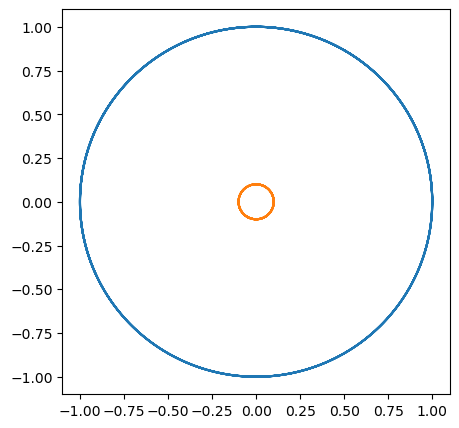

In [247]:
# Plot orbit, energies, angular momentum again

fig2 = plt.figure(figsize=(5,5))
plt.plot(r1_v[:,0],r1_v[:,1])
plt.plot(r2_v[:,0],r2_v[:,1])


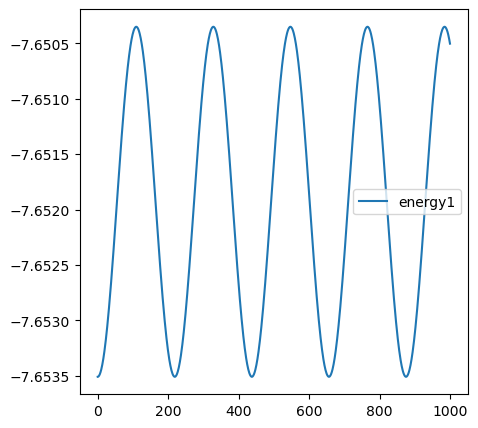

In [249]:
fig3 = plt.figure(figsize=(5,5))
plt.plot(E1_v[:,0] + E1_v[:,1], label='energy1')
#plt.plot(E2_v[:,0] + E2_v[:,1], label='energy2')
plt.legend()

Ensure that you calculate the *total* energy and angular momentum if you are allowing both bodies to move.  Discuss what you find here: how has the conservation changed with the method? How much computational time does this method take compared to Euler? Is it a better method (and what does better mean in this context)? 

In [114]:
class Planet:
    def __init__(self, mass, position, velocity):
        self.m = mass
        self.p = position
        self.v = velocity
    
    def distance(Planet1, Planet2):
        r = Planet1.p - Planet2.p
        return np.sqrt(r[0]**2 + r[1]**2)

    def force(Planet1, Planet2):
        pass